In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pwd

'/home/chrys/Documentos/Trabalho de PAD'

In [3]:
path = '/home/chrys/Documentos/Trabalho de PAD/'

In [4]:
df_tel = pd.read_csv(path + 'br_anatel_telefonia_movel_ddd.csv')

In [5]:
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55043 entries, 0 to 55042
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ano         55043 non-null  int64 
 1   mes         55043 non-null  int64 
 2   sigla_uf    55043 non-null  object
 3   ddd         55043 non-null  int64 
 4   tecnologia  55043 non-null  object
 5   sinal       55043 non-null  object
 6   acessos     55043 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ MB


In [6]:
df_tel.describe()

,ano,mes,ddd,acessos
count,55043.000000,55043.000000,55043.000000,5.504300e+04
mean,2014.611813,6.474683,55.856203,6.449459e+05
std,3.402866,3.417317,27.050296,1.592912e+06
min,2009.000000,1.000000,11.000000,1.000000e+00
25%,2012.000000,4.000000,33.000000,1.053450e+04
50%,2015.000000,6.000000,55.000000,9.481900e+04
75%,2017.000000,9.000000,81.000000,6.780860e+05
max,2021.000000,12.000000,99.000000,2.571837e+07


In [7]:
df_completo = df_tel['data'] = pd.to_datetime(df_tel['ano'].astype(str) + '-' + df_tel['mes'].astype(str) + '-01')

In [8]:
df_completo

0       2009-02-01
1       2009-02-01
2       2009-02-01
3       2009-02-01
4       2009-02-01
           ...    
55038   2021-07-01
55039   2021-07-01
55040   2021-07-01
55041   2021-07-01
55042   2021-07-01
Length: 55043, dtype: datetime64[ns]

In [9]:
df_evolucao = df_tel.groupby('data')['acessos'].sum().reset_index()
df_evolucao['acessos'] = df_evolucao['acessos'] / 1000000

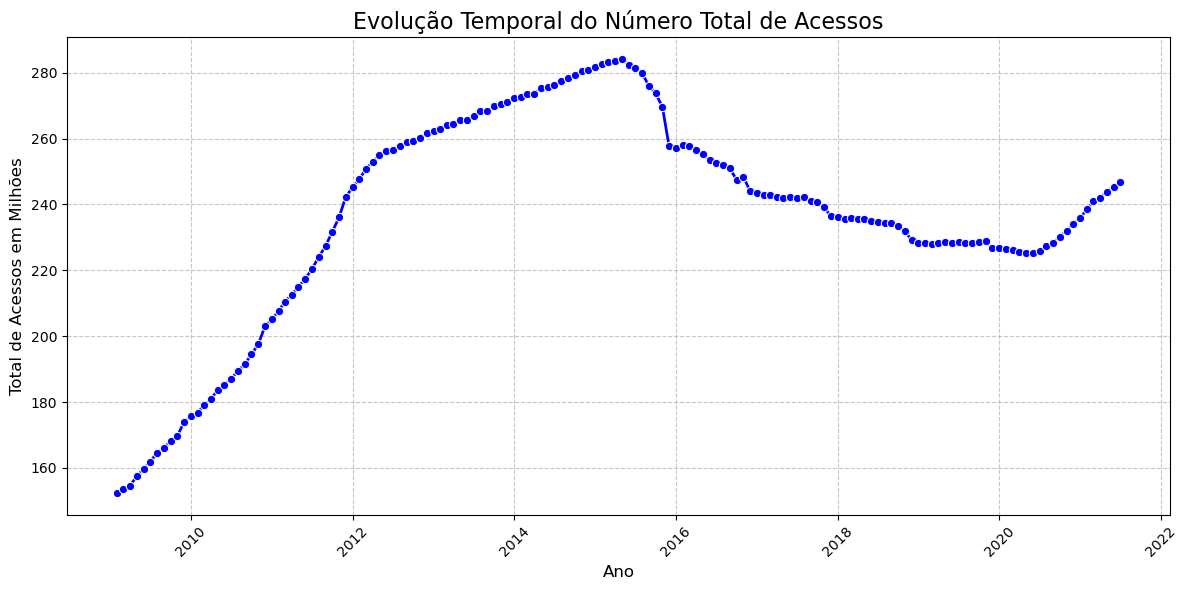

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_evolucao, x='data', y='acessos', marker='o', color='b', linewidth=2)

plt.title('Evolução Temporal do Número Total de Acessos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Acessos em Milhões', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
df_tec = df_tel.groupby(['data', 'tecnologia'])['acessos'].sum().reset_index()

In [12]:
df_tec['acessos_milhoes'] = df_tec['acessos'] / 1000000

In [13]:
tecnologias_principais = ['GSM', 'WCDMA', 'LTE', 'M2M', 'M2M Padrão', 'M2M Especial']

In [14]:
df_tec_filtrado = df_tec[df_tec['tecnologia'].isin(tecnologias_principais)]

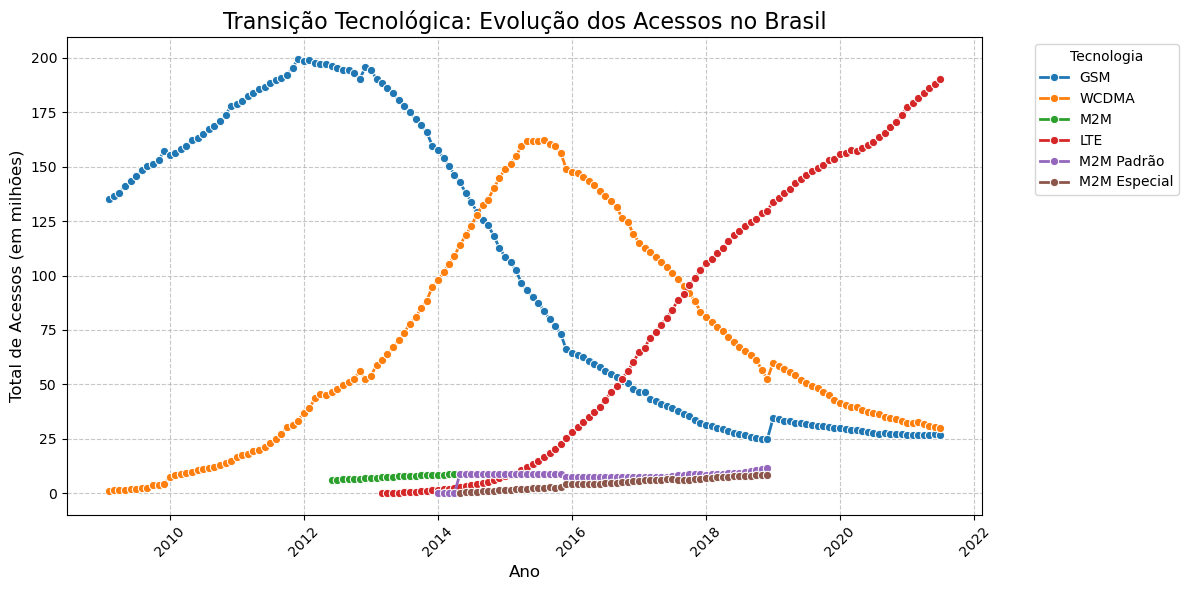

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tec_filtrado, x='data', y='acessos_milhoes', hue='tecnologia', marker='o', linewidth=2)

plt.title('Transição Tecnológica: Evolução dos Acessos no Brasil', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Acessos (em milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tecnologia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
df_2020 = df_tel[df_tel['ano'] == 2020]

In [17]:
df_uf = df_2020.groupby('sigla_uf')['acessos'].sum().reset_index()

In [18]:
df_uf['acessos_milhoes'] = df_uf['acessos'] / 1000000

In [19]:
df_uf = df_uf.sort_values('acessos_milhoes', ascending=False)

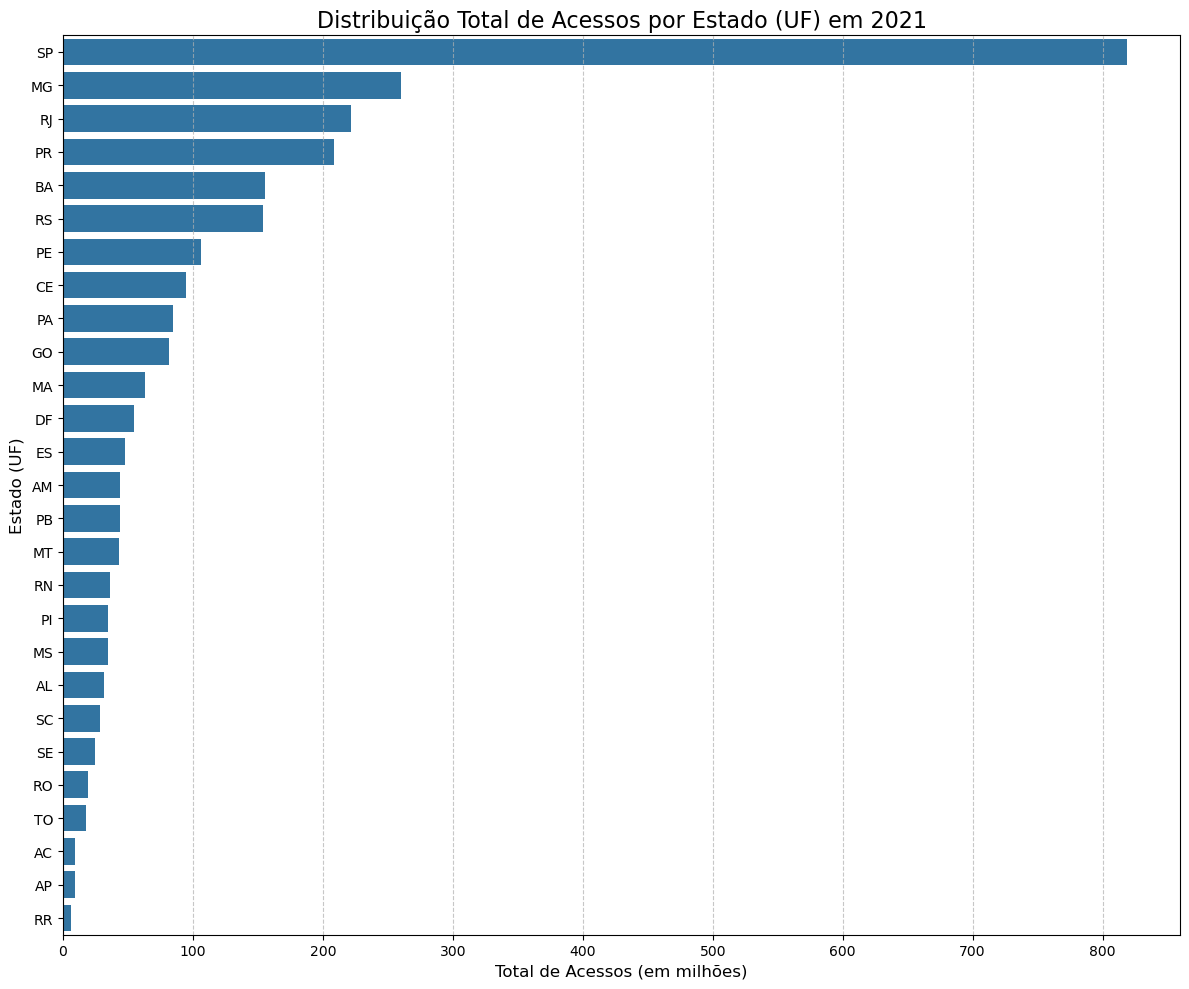

In [20]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_uf, x='acessos_milhoes', y='sigla_uf')

plt.title('Distribuição Total de Acessos por Estado (UF) em 2021', fontsize=16)
plt.xlabel('Total de Acessos (em milhões)', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()